# Week 2 Notes

## 2.1 [Car price prediction project](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/01-car-price-intro.md)

This week walk through a car price prediction project. User wants to sell a car, but doesn't know for how much. A regression model will be developed to recommend a car price. Dataset will be Cars dataset from Kaggle.

1. Prepare data and do Exploratory Data Analysis (EDA)
1. Use linear regression for predicting price
1. Understand linear regression internals (implement ourselves)
1. Evaluate quality of the model using RMSE
1. Feature Engineering (create new characteristics for our model to use)
1. Regularization (make model numerically stable)
1. Use the model

## 2.2 [Data Preparation](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/02-data-preparation.md)

In [1]:
import pandas as pd


df = pd.read_csv("data.csv")

Let's do some data cleaning. First, let's make column spaces consistent with lower caps and underscores as separators.

In [2]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
)

The colum names have been standardized. Let's now take care of the values:

The string columns are of type object. Let's select those. Also we will convert those to `str`, since that will take up less memory.

In [3]:
object_columns_list = df.select_dtypes(object).columns

df[object_columns_list] = (
    df.select_dtypes(object)
    .apply(lambda x: (
        x
        .str.lower()
        .str.replace(" ", "_")
    ) 
    , axis='index')
)

In [4]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


## 2.3 [Exploratory data analysis](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/03-eda.md)

Check 5 unique values per column (first with `.apply()`, then with for-loop):

In [5]:
df.apply(lambda x: print(x.name, "\n", x.unique()[:5], "\n"), axis="index");

make 
 ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler'] 

model 
 ['1_series_m' '1_series' '100' '124_spider' '190-class'] 

year 
 [2011 2012 2013 1992 1993] 

engine_fuel_type 
 ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'] 

engine_hp 
 [335. 300. 230. 320. 172.] 

engine_cylinders 
 [ 6.  4.  5.  8. 12.] 

transmission_type 
 ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown'] 

driven_wheels 
 ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive'] 

number_of_doors 
 [ 2.  4.  3. nan] 

market_category 
 ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance'] 

vehicle_size 
 ['compact' 'midsize' 'large'] 

vehicle_style 
 ['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback'] 

highway_mpg 
 [26 28 27 25 24] 

city_mpg 
 [19 20 18 17 16] 

popularity 
 [3916 3105  819  617 1013] 

msrp 
 [46135 40650 36350 2945

In [6]:
for col in df.columns:
    print(col, "\n", df[col].unique()[:5], "\n")

make 
 ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler'] 

model 
 ['1_series_m' '1_series' '100' '124_spider' '190-class'] 

year 
 [2011 2012 2013 1992 1993] 

engine_fuel_type 
 ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'] 

engine_hp 
 [335. 300. 230. 320. 172.] 

engine_cylinders 
 [ 6.  4.  5.  8. 12.] 

transmission_type 
 ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown'] 

driven_wheels 
 ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive'] 

number_of_doors 
 [ 2.  4.  3. nan] 

market_category 
 ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance'] 

vehicle_size 
 ['compact' 'midsize' 'large'] 

vehicle_style 
 ['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback'] 

highway_mpg 
 [26 28 27 25 24] 

city_mpg 
 [19 20 18 17 16] 

popularity 
 [3916 3105  819  617 1013] 

msrp 
 [46135 40650 36350 2945

Show number of unique values per column:

In [7]:
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's plot a histogram:

<Axes: xlabel='msrp', ylabel='Count'>

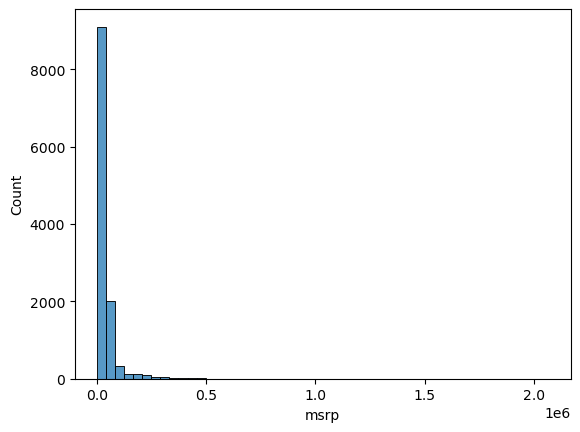

In [9]:
sns.histplot(df.msrp, bins=50)

This is called a 'long-tail distribution', where there are some outliers. To deal with this, we can provide a cut-off price. Let's cut it off at 100,000:

<Axes: xlabel='msrp', ylabel='Count'>

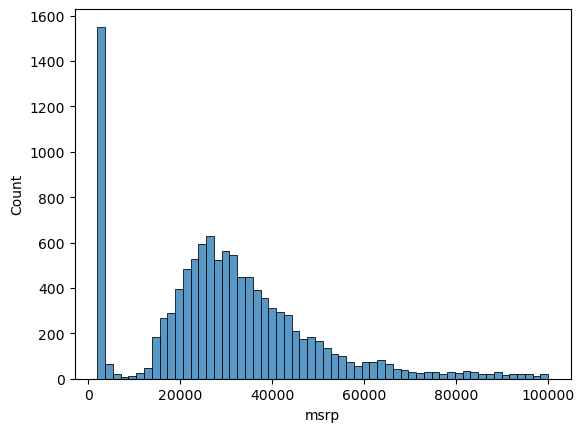

In [10]:
sns.histplot(df.msrp[df.msrp < 100_000])

The peak on the left is likely to be the minimum price:

In [11]:
df.msrp.sort_values()

775         2000
767         2000
768         2000
769         2000
770         2000
          ...   
6351     1382750
8486     1500000
11363    1500000
11364    1705769
11362    2065902
Name: msrp, Length: 11914, dtype: int64

In [12]:
(df.msrp==2000).sum()

np.int64(1036)

A long-tail distribution is not good for Machine Learning models, it will confuse them. We can deal with this by a logarithmic transformation of the data.

In [13]:
import numpy as np


x = [0, 1, 10, 100, 1_000, 10_000, 100_000]
y = np.log1p(x)

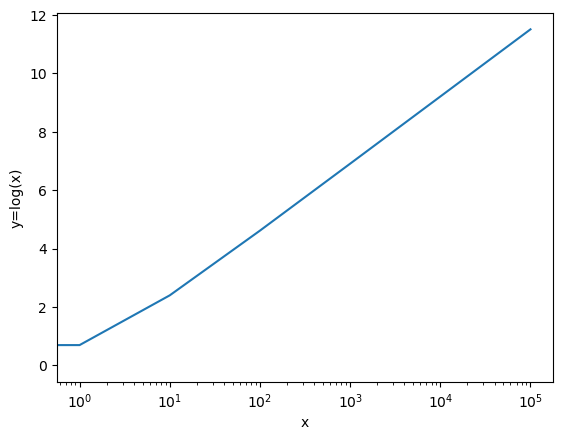

In [14]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y=log(x)")
plt.xscale("log")

The log transformation ensures that even for very large values of x, y does not explode in magnitude.

In [15]:
np.log1p(df.msrp)

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

Text(0.5, 1.0, 'With log transform')

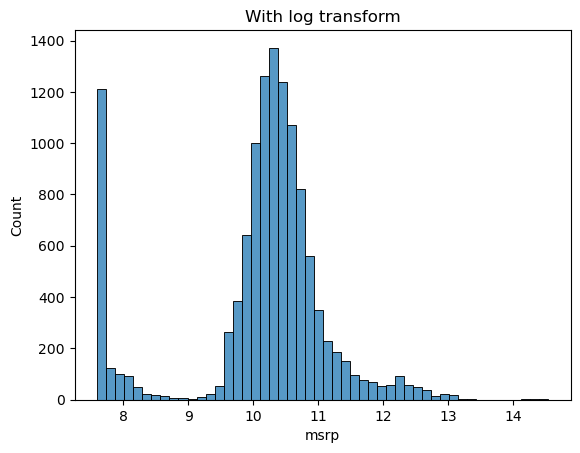

In [16]:
sns.histplot(np.log1p(df.msrp), bins=50).set_title("With log transform")

Text(0.5, 1.0, 'Without log transform')

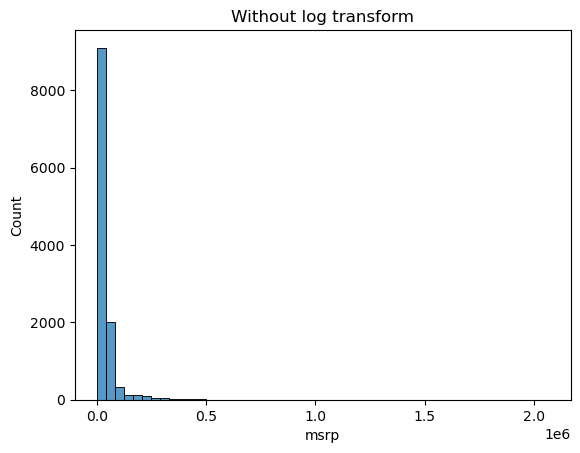

In [17]:
sns.histplot(df.msrp, bins=50).set_title("Without log transform")

We can see that with the log transformation, the price columnn `df.msrp` now looks like more like a normal distribution than a long-tail distribution. This way we don't need to discard data and our ML model will be able to use this column.

Let's now check missing values

In [18]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 [Setting up the validation framework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/04-validation-framework.md)

We will discuss the data into: Train, Validation, Test. Test will only be evaluated at the very end.
- Train: $\mathbf{X}_T, \mathbf{y}_T$
- Validation: $\mathbf{X}_V, \mathbf{y}_V$
- Test: $\mathbf{X}_{TEST}, \mathbf{y}_{TEST}$

We'll split the data using Pandas into 60% training, 20% validation, 20% test. 20% of the dataset amounts to (rounded to nearest integer):

In [19]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

In [20]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [21]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

The problem is that the data is organized. So looking at validation set for instance, we see that it starts off with the BMW's:

In [22]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


Then looking at the train set, we see it starts with all fords:

In [23]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


This is a problem, because our datasets for training, validation, testing should be distributed similarly. To address this, we can shuffle the data.

In [24]:
idx = np.arange(n)

In [25]:
np.random.seed(2)
np.random.shuffle(idx)

In [26]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [48]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [49]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [50]:
X_train = df_train.drop(columns='msrp').values
X_val = df_val.drop(columns='msrp').values
X_test = df_test.drop(columns='msrp').values

## 2.5 [Linear regression](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/05-linear-regression-simple.md)

Linear regression is a model to predict a continuous variable. Let's take our ML model:

$$
g(\mathbf{X}) \approx \mathbf{y}
$$

For now, let's look at a single observation:

$$
g(\mathbf{x}_i) \approx y_i
$$

The vector $\mathbf{x}_i$ is:

$$
\mathbf{x}_i = \begin{bmatrix} x_{i1} & x_{i2} & \dotsb & x_{iN} \end{bmatrix}
$$

and the corresponding $y_i$:

$$
y_i = g(\begin{bmatrix} x_{i1} & x_{i2} & \dotsb & x_{iN} \end{bmatrix})
$$


Now, let's look at a given row of our data:

In [30]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
msrp                                      479775
Name: 10, dtype: object

We will handpick some columns: `engine_hp`, `city_mpg`, `popularity`:

$$
x_i = \begin{bmatrix} 147 & 17 & 586 \end{bmatrix}
$$

Let's now find a model $g$ that takes in $x_i$ and predicts the price $y_i$. In linear regression, our model looks as follows:

$$
g(\mathbf{x_i}) = w_o + w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 = w_0 + \sum_{i=1}^3 w_i x_i
$$

Now, let's implement linear regression in code:


In [140]:
w0 = 0
w = [1, 1, 1]

def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred

In [141]:
xi = [147, 16, 586]

linear_regression(xi)

749

The values for w0 and w are randomly chosen, therefore the prediction does not make much sense. Let's try different values:

In [142]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

linear_regression(xi)

10.452000000000002

How can we interpret the model and prediction we came up with?

$$
0.01 \cdot 147 + 0.04 \cdot 16 + 0.002 \cdot 586 = 10.45
$$

The first term corresponds to `engine_hp`. The weight of $0.01$ means that each unit increase in engine horsepower results in a (log) price increase of 1.47. The weight therefore is a factor which indicates the importance of a given feature. If the weight is very high, that feature has a strong influence on the price.

First, note that what we predict is the logarithm of the price, not the price itself. To undo the logarithm transform, we can use the formula:

In [34]:
np.expm1(10.45)

np.float64(34543.37470927775)

## 2.6 [Linear regression: vector form](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/06-linear-regression-vector.md)

We can write the linear regression equation in vector form:

$$
g(\mathbf{x_i}) = \begin{bmatrix} 1 & x_{i1} & x_{i2} & x_{i3} \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ w_3 \end{bmatrix} = \langle \mathbf{x}_i, \mathbf{w}_i \rangle = \mathbf{x}_i^T \mathbf{w}_i
$$

In [55]:
xi = [1] + xi
w = np.array([w0] + w)

def linear_regression(xi, w):
    return np.dot(xi, w)

In [56]:
linear_regression(xi, w)

np.float64(17.622)

Now let's go back to all observations, not just one.

$$
\mathbf{X} \mathbf{w} =

\begin{bmatrix} 1 & x_{11} & x_{12} & \dots & n_{1n} 
             \\ 1 & x_{21} & x_{22} & \dots & x_{2n} \\ 
             \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ 
             \\ 1 & x_{m1} & x_{m2} & \dots & x_{mn} \\ 
\end{bmatrix}

\begin{bmatrix}
w_0 \\ w_1 \\ \vdots \\ w_m
\end{bmatrix} = 

\begin{bmatrix}
\mathbf{x}_1^T \mathbf{w} \\ \mathbf{x}_2^T \mathbf{w} \\ \vdots \\ \mathbf{x}_m^T \mathbf{w}
\end{bmatrix} 

$$

In [57]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [144]:
X_train = df_train[["engine_hp", "city_mpg", "popularity"]].values

def linear_regression(X_train, w):
    X_train = np.hstack([np.ones(shape=(X_train.shape[0], 1)), X_train])
    return X_train @ w

In [150]:
linear_regression(X_train, w)

array([12.38 , 13.552, 11.05 , ..., 11.798, 13.492, 11.796])

## 2.7 [Training linear regression: Normal equation](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/07linear-regression-training.md)

In the previous lesson, we built a function to make predictions using weights and a feature matrix. But how do we find these weights?

Ideally, we want our model $g(\mathbf{X})$ to match $y$, but since that is usually not possible, we try to approximate it instead. 

$$
g(\mathbf{X}) \approx y
$$

Our model is defined as:

$$
g(\mathbf{X}) = \mathbf{X} \mathbf{w}
$$

This gives the equation:

$$
\mathbf{y} \approx \mathbf{X} \mathbf{w}
$$

If $\mathbf{X}$ were invertible, we could solve for $\mathbf{w}$ by left-multiplying by $\mathbf{X}^{-1}$:

$$
\mathbf{w} \approx \mathbf{X}^{-1} \mathbf{y}
$$

However, $\mathbf{X}$ is typically not square and thus not invertible. To address this, we left-multiply by the transpose $\mathbf{X^T}$:

$$
\mathbf{X}^T \mathbf{X} \mathbf{w} \approx \mathbf{X}^T \mathbf{y}
$$

This forms the Gram Matrix $\mathbf{X}^T \mathbf{X}$, which is usually invertible.

$$
\underbrace{\mathbf{X}^T \mathbf{X}}_{\text{Gram Matrix}} \mathbf{w} \approx \mathbf{X}^T \mathbf{y}
$$

Since the  Gram matrix  does have an inverse, we can left-multiply by it:

$$
(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \mathbf{w} \approx (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

We can simplify this:

$$
\underbrace{(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X}}_{I} \mathbf{w} \approx (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

$$
\mathbf{w} \approx (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This equation finds the $\mathbf{w}$ which minimizes the sum of squared errors between the data and the model. This derivation is not the proper derivation of the Normal equation that demonstrates this point. I am planning to write a blog post about this topic.

In [159]:
def train_linear_regression(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X])
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

Let's take the first 20 samples from $\mathbf{X}_{train}$ and $\mathbf{y_train}$ and plug it into `train_linear_regression`. The reason for only picking the first two samples, is because there are `nan` values in $\mathbf{X}_{train}$ which results in a matrix filled with `nan`. Normally we would deal somehow with the `nan` values during data preparation, but for now we'll just ignore it.

In [160]:
train_linear_regression(X_train[:20], y_train[:20])

array([ 6.60542123e+00,  1.01942686e-02,  6.59118053e-02, -8.72271244e-05])

## 2.8 [Baseline model for car price prediction project](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/08-baseline-model.md)

We will create a baseline model using only the numerical features.

In [163]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [189]:
df_train_numeric = (
    df_train
    .select_dtypes(np.number)
    .drop(columns="msrp")
    .fillna(0)
)

X_train = df_train_numeric.values
y_train = np.log1p(df_train.msrp.values)

Note, since we have `nan` values, the prediction will also be `nan`. We fill them with zeros, meaning that for those particular observations, those features are ignored. In practice this may work fine, though there are other ways of dealing with `nan` (e.g. replacing with mean or median of the column).

In [190]:
w = train_linear_regression(X_train, y_train)

Now that we have the weights, we can make predictions:

In [191]:
y_pred = w[0] + X_train.dot(w[1:])

In [192]:
y_pred

array([ 9.45920523,  9.710962  , 10.23607704, ..., 10.73589435,
       12.12338124, 10.46736738])

Let's now look at the distribution:

<Axes: ylabel='Count'>

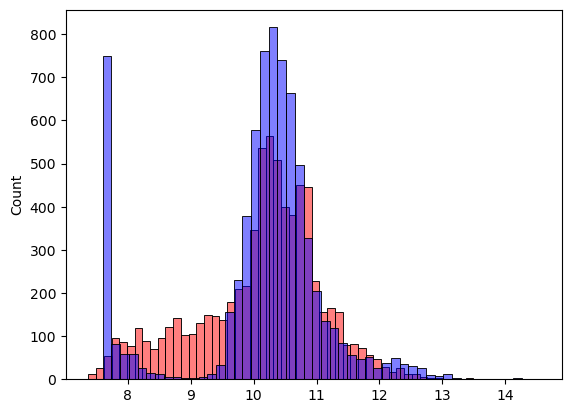

In [198]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

We can also check a correlation plot between $y_{train}$ and $y_{pred}$:

<Axes: xlabel='$y_{train}$', ylabel='$y_{pred}$'>

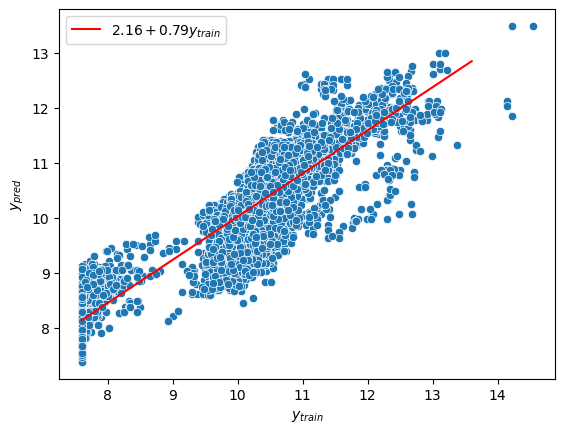

In [238]:
import matplotlib.pyplot as plt

sns.scatterplot(x=y_train, y=y_pred)
plt.xlabel("$y_{train}$")
plt.ylabel("$y_{pred}$")
w = train_linear_regression(y_train, y_pred)
x = np.arange(y_train.min(), y_train.max(), 2)
y = w[0] + w[1]*x
sns.lineplot(x=x, y=y, color="red", label=f"${w[0].round(2)} + {w[1].round(2)} y_{{train}}$")

## 2.9 [Root mean squared error](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/09-rmse.md)

## 2.10 [Using RMSE on validation data](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/10-car-price-validation.md)

## 2.11 [Feature engineering](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/11-feature-engineering.md)

## 2.12 [Categorical variables](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/12-categorical-variables.md)

## 2.13 [Regularization](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/13-regularization.md)

## 2.14 [Tuning the model](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/14-tuning-model.md)

## 2.15 [Using the model](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/15-using-model.md)

## 2.16 [Car price prediction project summary](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/16-summary.md)

## 2.17 [Explore more](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/17-explore-more.md)

## 2.18 [Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/homework.md)